
NOTE

- ตาราง 2019 ที่ต้องเปลี่ยนคือ ข้อ 99 กับ 100 indoor outdoor เพื่อให้ตรงกับ ข้อ 109 - 112 ของปี 2020 idea: คิดว่าน่าจะต้องแยกคอลัมป์ไปเลย แล้วใช้ onehot
- ข้อ 12 ตาราง 2019 กับข้อ 29 ตาราง 2020 ทำ choice ให้เหมือนตาราง 2019
- พวก cigcurio cig suscep ที่เติมพวกการสูบอย่างอื่นเข้าไปด้วย ยังไม่ได้ใส่กลับเข้ามา
- ทบทวน features อีกที + ยังมีพวกที่ยังไม่ได้ใส่มา psu finwgt.... schooltype
- ข้อ 61 รวมได้แต่ตอนนี้ขก !!!ต้องกลับมาทำ


- ดูคร่าว ๆ แล้วผลของ cokumns ที่เพิ่มเข้ามาน่าสนใจมากเพราะมี column Q65 เพิ่มมา ซึ่งเกี่ยวกับการคิดจะเลิกบุหรี่ ถ้าเราสามารถหา research ได้ว่าบุหรี่ไฟฟ้าใช้แล้วทำให้เลิก tobacco product ยากขึ้นไปอีกจะดีมาก ทำให้มีอะไรเขียน
- check ตรง _S อีกทีว่า make sense ไหม

# !!! ยังไม่ได้เอาออก

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [4]:
data_2019_full = pd.read_csv('nyts2019(csv for tableau).csv') 
data_2020_full = pd.read_csv('nyts2020.csv')

In [67]:
for col in data_2019_full.columns:
    data_2019_full[col] = data_2019_full[col].apply(lambda x: str(x) if type(x) == int else x)

In [68]:
#!!!!caution เขียนแบบนี้คิดว่าค่อข้างอันตราย
#ทำให้พวก 1.0 เป็น 1
for col in data_2020_full.columns:
    data_2020_full[col] = data_2020_full[col].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '.0'\
                                                    else 'S' if x == '.S'\
                                                   else 'Z' if x == '.Z'\
                                                   else 'N' if x == '.N'\
                                                   else 'E' if x == '.E'
                                                   else x)

In [69]:
data_2019_full.head()

,psu,StudentLoginID,Q1,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,...,CPIPE,CSNUS,CDISSOLV,CBIDIS,CHTP,stratum,finwgt,v_stratum,v_stratum2,psu2
0,58123,25830,7,2,4,.N,.N,.N,.N,.N,...,2,2,2,2,2,HR4,159.205484,204,204,58123
1,58123,25831,8,1,4,NaN,1,NaN,NaN,NaN,...,2,2,2,2,2,HR4,150.693620,204,204,58123
2,58123,25832,6,1,4,NaN,NaN,NaN,NaN,1,...,2,2,2,2,2,HR4,150.693620,204,204,58123
3,58123,25833,6,1,4,NaN,1,NaN,NaN,NaN,...,2,2,2,2,2,HR4,150.693620,204,204,58123
4,58123,25834,7,1,4,1,NaN,NaN,NaN,NaN,...,2,2,2,2,2,HR4,221.290481,204,204,58123


In [70]:
data_2020_full.head()

,QN1,QN2,QN3,QN4A,QN4B,QN4C,QN4D,QN4E,QN5A,QN5B,...,CSNUS,CDISSOLV,CBIDIS,psu,stratum,hsms,finwgt,v_stratum,v_stratum2,psu2
0,7,1,4,NaN,1,NaN,NaN,NaN,1,NaN,...,2,2,2,15845,HR1,HS,722.171606,201,201,15845
1,6,2,4,NaN,1,NaN,NaN,NaN,NaN,NaN,...,2,2,2,15845,HR1,HS,966.711084,201,201,15845
2,7,2,4,NaN,NaN,NaN,NaN,1,1,NaN,...,2,2,2,15845,HR1,HS,966.711084,201,201,15845
3,7,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,15845,HR1,HS,1374.031465,201,201,15845
4,7,1,8,NaN,1,NaN,NaN,NaN,NaN,NaN,...,1,1,1,15845,HR1,HS,957.943418,201,201,15845


In [5]:
data_link = pd.read_excel('Concatenate 2019 - 2020.xlsx')

In [6]:
#create dict to rename columns in 2020 table
rename_dict = {}
not_match = []
for i, j in zip(data_link['compare to 2020 features'], data_link['2019 features']):
#     if j in data_2020.columns and i!=j: #ถ้ามี columns ซ้ำให้เปลี่ยนชื่อเป็น _2020
#         data_2020.rename(columns = {j : j + '_2020'}, inplace = True)
    if j != 'None':
        rename_dict[i] = j + '_2019'

In [7]:
feature_2019 = list(data_link['2019 features'].values)[:-2]
[feature_2019.remove(i) for i in ['QN99', 'QN100']] #เอา 109-112 ของปี 2020 ออก     อาจจะทำอะไรได้????!!!

[None, None]

In [8]:
feature_2019 = np.unique(feature_2019)
feature_2019 = list(feature_2019)
feature_2019.remove('None')
feature_2019.remove('QN')

In [9]:
data_2020_full.rename(columns = rename_dict, inplace = True)
data_2020 = data_2020_full[[(i + '_2019') for i in feature_2019]]
data_2020 = data_2020.rename(columns = {i : i[:-5] for i in data_2020.columns})

data_2019 = data_2019_full[feature_2019]

In [10]:
data_2019['year'] = 2019
data_2019

<ipython-input-10-779b2e412d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['year'] = 2019


,QN1,QN10,QN101A,QN101B,QN101C,QN101D,QN101E,QN101F,QN102A,QN102B,...,QN90,QN91,QN92,QN93,QN94,QN95,QN96,QN97,QN98,year
0,7,S,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,3,5,4,3,3,4,3,1,1,2019
1,8,S,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,1,3,5,4,1,4,3,4,5,2019
2,6,S,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,1,3,4,4,1,3,3,1,1,2019
3,6,S,1,NaN,NaN,NaN,NaN,NaN,N,N,...,1,4,4,2,1,2,2,1,1,2019
4,7,S,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,6,6,6,6,6,6,6,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,5,S,NaN,NaN,NaN,NaN,NaN,1,1,NaN,...,4,4,3,4,3,3,3,6,1,2019
19014,6,S,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,3,5,1,2,3,1,1,2019
19015,6,S,NaN,1,NaN,NaN,1,1,1,NaN,...,1,5,3,5,1,3,3,8,8,2019
19016,5,S,NaN,NaN,NaN,NaN,NaN,1,1,NaN,...,1,4,3,3,1,3,3,3,1,2019


In [11]:
data_2020['year'] = 2020
data_2020

,QN1,QN10,QN101A,QN101B,QN101C,QN101D,QN101E,QN101F,QN102A,QN102B,...,QN90,QN91,QN92,QN93,QN94,QN95,QN96,QN97,QN98,year
0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2020
2,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,5.0,5.0,6.0,4.0,1.0,2.0,2020
3,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14526,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2020
14527,10.0,3.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,6.0,5.0,8.0,8.0,2020
14528,9.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,5.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,2020
14529,9.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,...,4.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,1.0,2020


In [12]:
data_concat = pd.concat([data_2019, data_2020], axis = 0, ignore_index = True)

In [13]:
data_concat.reset_index(inplace = True, drop = True)

# Remove student who have smoked e-cig

##### ทำแล้วลืม มันอยู่ใน target

In [182]:
# #Remove student who have ever smoked ecig
# f_2019 = 0
# f_2020 = 0
# drop_ix = []
# #ไม่ยุ่งกับคนที่สูบ ecig ก่อน          2019
# for ix,i in enumerate((data_2019_full[targets_2019] == 'S').any(axis = 1).values):
#     if i and data_concat['year'][ix] == 2019:
#         drop_ix.append(ix)
#         f_2019+=1

# #ไม่ยุ่งกับคนที่สูบ ecig ก่อน          2020
# for ix,i in enumerate((data_2020_full[targets_2020] == 'S').any(axis = 1).values):
#     if i and data_concat['year'][ix] == 2020:
#         drop_ix.append(ix)
#         f_2020+=1
        
# drop_ix = np.unique(drop_ix)
# data_cleaned = data_concat.drop(index = drop_ix)



# Target

In [183]:
#ecigarette curiosity and susceptibility
targets_2019 = ['QN43',
 'QN44',
 'QN45',
 'QN46']

targets_2020 = ['QN17',
 'QN18',
 'QN19',
 'QN20']


In [184]:
data_2019_target = data_2019_full[targets_2019]
data_2020_target = data_2020_full[targets_2020].rename(columns = {i:j for i, j in zip(targets_2020, targets_2019)})

In [185]:
data_concat_target = pd.concat([data_2019_target, data_2020_target], axis = 0, ignore_index = True)

In [186]:
data_concat_target.reset_index(inplace = True, drop = True)

In [187]:
data_concat = pd.concat([data_concat, data_concat_target], axis = 1)

In [188]:
#drop missings that are legitimate skip of the targets
data_concat_neverecig = data_concat.loc[(data_concat[targets_2019] != 'S').all(axis = 1)]

In [189]:
#drop missings that are not legitimate skip
data_concat_neverecig = data_concat_neverecig.loc[((data_concat_neverecig != 'N') &
                                                  (data_concat_neverecig != 'Z') &
                                                  (data_concat_neverecig != 'E') &
                                                   (data_concat_neverecig != '.N') &
                                                  (data_concat_neverecig != '.Z') &
                                                  (data_concat_neverecig != '.E')
                          ).all(axis = 1)]

/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [190]:
data_concat_neverecig.fillna(value = '0', inplace = True)

In [191]:
#aggregate targets -> Level of Susceptibility # ไม่ work
for target in targets_2019:
    temp = []
    for i in data_concat_neverecig[target]:
        if (i == '4'):
            temp.append('0')
        elif (i=='2' and i=='3'):
            temp.append('1')
        elif (i == '1'):
            temp.append('2')        
        else:
            temp.append(i)
    data_concat_neverecig[target] = temp

In [192]:
data_concat_neverecig[target].value_counts()

0      10975
4.0     7660
3.0     2462
3       2133
2        868
2.0      563
1.0       77
Name: QN46, dtype: int64

In [193]:
data_concat_neverecig['target_suscep'] = (data_concat_neverecig[['QN44', 'QN45', 'QN46']] != '0').any(axis = 1).astype(int)

## Check Target Labeling

In [274]:
sum((data_concat_neverecig.loc[data_concat_neverecig['year'] == '2019'][['QN44', 'QN45', 'QN46']] != '0').any(axis = 1))/len((data_concat_neverecig.loc[data_concat_neverecig['year'] == '2019'][['QN44', 'QN45', 'QN46']] != '0').any(axis = 1))

0.3547565396296659

In [275]:
sum((data_concat_neverecig.loc[data_concat_neverecig['year'] == '2020'][['QN44', 'QN45', 'QN46']] != '0').any(axis = 1))/len((data_concat_neverecig.loc[data_concat_neverecig['year'] == '2020'][['QN44', 'QN45', 'QN46']] != '0').any(axis = 1))

0.7423439543045902

In [ ]:
#so surprised!!!

# check 'S' in the dataset

In [194]:
data_model = data_concat_neverecig.copy()

In [195]:
{data_model.columns[i]:j for i,j in enumerate((data_model[feature_2019] == 'S').sum())}

{'QN1': 0,
 'QN10': 9877,
 'QN101A': 0,
 'QN101B': 0,
 'QN101C': 0,
 'QN101D': 0,
 'QN101E': 0,
 'QN101F': 0,
 'QN102A': 0,
 'QN102B': 0,
 'QN102C': 0,
 'QN102D': 0,
 'QN102E': 0,
 'QN102F': 0,
 'QN102G': 0,
 'QN102H': 0,
 'QN102I': 0,
 'QN102J': 0,
 'QN102K': 0,
 'QN103': 0,
 'QN104': 0,
 'QN11': 10176,
 'QN12': 10176,
 'QN13': 10176,
 'QN14': 330,
 'QN15': 330,
 'QN16': 330,
 'QN17': 330,
 'QN18': 0,
 'QN19': 9920,
 'QN2': 0,
 'QN20': 9920,
 'QN21': 10111,
 'QN22A': 10111,
 'QN22B': 10111,
 'QN22C': 10111,
 'QN22D': 10111,
 'QN23': 287,
 'QN24': 287,
 'QN25': 287,
 'QN26': 287,
 'QN27': 0,
 'QN28': 10042,
 'QN29': 10042,
 'QN3': 0,
 'QN30': 165,
 'QN47': 0,
 'QN48': 10029,
 'QN49': 10029,
 'QN4A': 0,
 'QN4B': 0,
 'QN4C': 0,
 'QN4D': 0,
 'QN4E': 0,
 'QN50A': 10161,
 'QN50B': 10161,
 'QN50C': 10161,
 'QN50D': 10161,
 'QN50E': 10161,
 'QN50F': 10161,
 'QN51': 178,
 'QN55A': 0,
 'QN55B': 0,
 'QN55C': 0,
 'QN55D': 0,
 'QN55E': 0,
 'QN55F': 0,
 'QN56A': 10033,
 'QN56B': 10033,
 'QN56C': 10

In [196]:
S_in_col = ['QN7', 'QN8', 'QN9', 'QN10', 'QN11', 'QN12', 'QN13', 'QN67', 'QN68']

In [197]:
feature_S = []
for ix,i in enumerate(S_in_col):
    data_model['S_%s'%ix] = (data_model[i] == 'S').astype(int)
    feature_S.append('S_%s'%ix)

## remove irrational 'S'

In [198]:
data_model = data_model.loc[data_model['QN6'] != 'S']

## 'S' ตัดปัด ๆ เป็น 0 และสร้าง column ใหม่ไปก่อน ??ตกลงมันเป็น ordinal ไหม ต้องศึกษา!!!!

In [199]:
#ลองใส่ -1 ไปให้หมดก่อน
data_model.replace('S', '-1', inplace = True)

# change type of all integer to string
!!!some columns need to be change bank to integer such as the number of days

In [200]:
for col in data_concat_neverecig.columns:
    data_concat_neverecig[col] = data_concat_neverecig[col].astype(str)

# drop dup?

# Train test split

In [239]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(data_model[features].values,data_model['target'],random_state=42, train_size = 0.7)#, stratify = data_model[target])
X_train,X_test,y_train,y_test=train_test_split(data_model[feature_2019\
                                                         + feature_S].values,data_model['target_suscep'],random_state=42, train_size = 0.8, stratify = data_model['target_suscep'], shuffle = True)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

f1_scorer = make_scorer(f1_score, average = 'macro')
recall = make_scorer(recall_score, pos_label='1', average = 'macro')

params = {'max_leaf_nodes': list(range(2, 30)), 'min_samples_split': [2, 3, 4] ,'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv = 5, scoring = recall)
                              #cv=StratifiedKFold(n_splits=5, shuffle=True, random_state = 42),
                                   
random_search_cv.fit(data_model[feature_2019].values,data_model['target_suscep'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a s

/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29],
                                        'min_samples_split': [2, 3, 4]},
                   scoring=make_scorer(recall_score, pos_label=1, average=macro),
                   verbose=1)

In [50]:
random_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=24, random_state=42)

In [52]:
clf.fit(X_train, y_train)
print('accuracy:', clf.score(X_test,y_test))

accuracy: 0.6982308001608364


In [205]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score
xgb_model = xgb.XGBClassifier()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance

f1_scorer = make_scorer(f1_score, average = 'macro')
recall_scorer = make_scorer(recall_score, pos_label = '1', average = 'macro')

parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              
              
              #############!!!!!!!!!!!!!!!!!!!!!!!"min_child_weight" : [ 1, 3, 5, 7 ],
              "min_child_weight" : [ 0, 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.5, 1, 5, 7, 15],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['binary:logistic'],
#               'learning_rate': [0.05], #so called `eta` value
#               'max_depth': [6],
#               'min_child_weight': [11],
#               'silent': [1],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [5], #number of trees, change it to 1000 for better results
#               'missing':[-999],
#               'seed': [1337]}


random_search_cv = RandomizedSearchCV(xgb_model, parameters, n_jobs=-1, 
                   cv=StratifiedKFold(n_splits=10, shuffle=True, random_state = 42), 
                   scoring = recall_scorer,
                   verbose=4, refit=True)

random_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=-1,
                   param_distrib

In [206]:
random_search_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=7, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
import xgboost as xgb
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=7, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [241]:
clf.fit(X_train, y_train)
print('accuracy:', clf.score(X_test,y_test))

accuracy: 0.8464025869037995


In [256]:
Y_pred = clf.predict_proba(X_test)[:,1] >=0.3

Text(0.5, 1.0, 'Confusion Matrix\n')

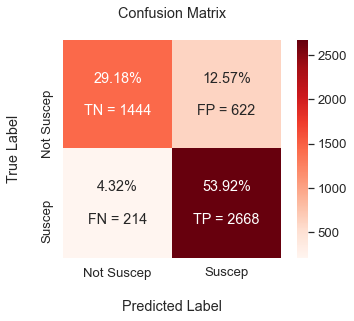

In [257]:
# Y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test.values.astype(int), Y_pred)

import seaborn as sns
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v3}\n\n{v1} = {v2}" for v1, v2, v3 in
          zip(group_names,group_counts, group_percentages)]

# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2) 
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds', xticklabels = ['Not Suscep','Suscep'],
            yticklabels = ['Not Suscep','Suscep'] ,square = True)
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label\n')
plt.title('Confusion Matrix\n')

Text(0.5, 1.0, 'Confusion Matrix\n')

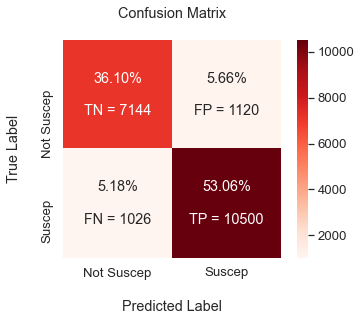

In [244]:
Y_pred = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train.values.astype(int), Y_pred)

import seaborn as sns
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v3}\n\n{v1} = {v2}" for v1, v2, v3 in
          zip(group_names,group_counts, group_percentages)]

# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2) 
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds', xticklabels = ['Not Suscep','Suscep'],
            yticklabels = ['Not Suscep','Suscep'] ,square = True)
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label\n')
plt.title('Confusion Matrix\n')

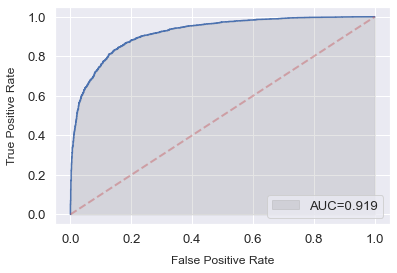

In [245]:
##try to use labelpad to change format
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_pred_proba = clf.predict_proba(X_test.astype(int))[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label = 1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate', fontsize = 12, labelpad=10)
plt.ylabel('True Positive Rate', fontsize = 12, labelpad=10)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.4)

plt.fill_between(fpr, 0, tpr, color='grey', alpha=.2, label="AUC="+str(round(auc,3)))

plt.legend(loc=4)

plt.plot

plt.show()

Average precision-recall score: 0.94


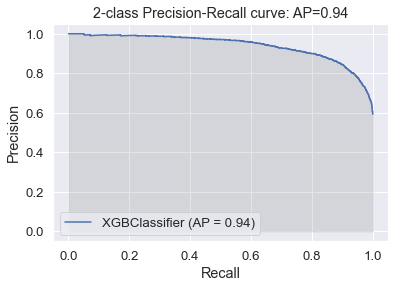

In [246]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

y_score = clf.predict_proba(X_test)[:,1]
average_precision = average_precision_score(y_test, y_score, pos_label=1)
prec, rec, _ = metrics.precision_recall_curve(y_test,  y_score, pos_label = 1)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

disp.ax_.fill_between(rec, prec, color='grey', alpha=.2, label="AUC="+str(round(auc,3)))
plt.show()

In [247]:
Y_pred = clf.predict_proba(X_test)[:,1] >=0.38
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, digits = 2, target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.85      0.75      0.80      2066
    Positive       0.83      0.91      0.87      2882

    accuracy                           0.84      4948
   macro avg       0.84      0.83      0.83      4948
weighted avg       0.84      0.84      0.84      4948



In [280]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #get only ten best
    fi_df = fi_df[:40]
    
    #Define size of bar plot
    plt.figure(figsize=(12,9))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette="OrRd_r")

    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE\n')
    plt.xlabel('\nFEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES\n')

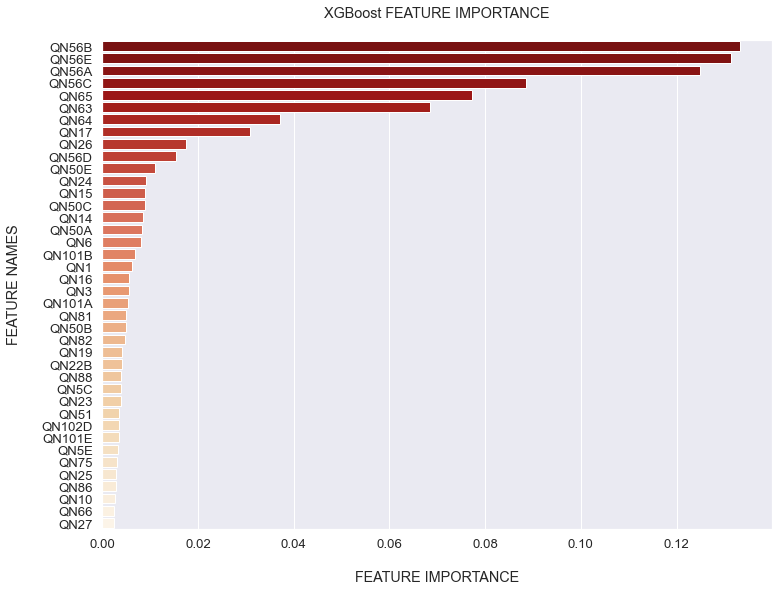

In [282]:
plot_feature_importance(clf.feature_importances_,feature_2019\
                                                         + feature_S,'XGBoost')

# NN

In [216]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [217]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [218]:
clf = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.01),
    tf.keras.layers.Dense(2)
])

In [219]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, recall_score

f1_scorer = make_scorer(f1_score, average = 'macro')
recall_scorer = make_scorer(recall_score, average = 'macro')


clf.compile(optimizer=tf.keras.optimizers.Adam(1e-4, beta_1 = 0.95),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [220]:
temp = []
for i in X_train:
    temp2 = []
    for j in i:
        temp2.append(int(j))
    temp.append(temp2)
X_train = temp

In [221]:
clf.fit(np.array(temp), y_train.values.astype(int), epochs= 200, batch_size = 1000)

Epoch 1/200
20/20 [==============================] - 1s 7ms/step - loss: 3.2942 - accuracy: 0.5292
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 2.6846 - accuracy: 0.6392
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 2.1921 - accuracy: 0.6865
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 1.8402 - accuracy: 0.6940
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 1.5506 - accuracy: 0.7166
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 1.3339 - accuracy: 0.7286
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 1.1826 - accuracy: 0.7315
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 1.0528 - accuracy: 0.7361
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.9589 - accuracy: 0.7396
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.8744 - accuracy: 0.7429
Epoch 11/

20/20 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.8207
Epoch 84/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.8208
Epoch 85/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.8248
Epoch 86/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.8248
Epoch 87/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8224
Epoch 88/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8236
Epoch 89/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8213
Epoch 90/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8199
Epoch 91/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8224
Epoch 92/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8227
Epoch 93/200


In [222]:
probability_model = tf.keras.Sequential([clf, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test.astype(int))
Y_pred_test = np.array([predictions[i][1] >= 0.34 for i in range(len(predictions))])

Text(0.5, 1.0, 'Confusion Matrix\n')

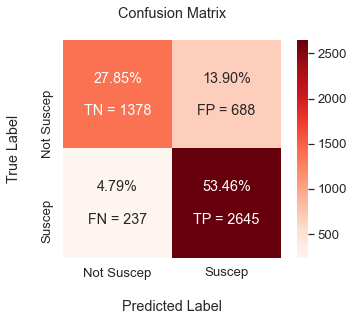

In [223]:
# Y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test.values.astype(int), Y_pred_test)

import seaborn as sns
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v3}\n\n{v1} = {v2}" for v1, v2, v3 in
          zip(group_names,group_counts, group_percentages)]

# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2) 
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds', xticklabels = ['Not Suscep','Suscep'],
            yticklabels = ['Not Suscep','Suscep'] ,square = True)
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label\n')
plt.title('Confusion Matrix\n')

/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


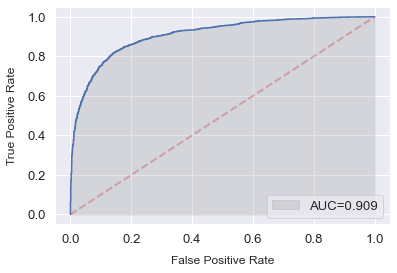

In [224]:
##try to use labelpad to change format
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_pred_proba = probability_model.predict_proba(X_test.astype(int))[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label = 1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate', fontsize = 12, labelpad=10)
plt.ylabel('True Positive Rate', fontsize = 12, labelpad=10)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.4)

plt.fill_between(fpr, 0, tpr, color='grey', alpha=.2, label="AUC="+str(round(auc,3)))

plt.legend(loc=4)

plt.plot

plt.show()

In [225]:
Y_pred = probability_model.predict_proba(X_test.astype(int))[:,1] >=0.38
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, digits = 2, target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.84      0.71      0.77      2066
    Positive       0.81      0.90      0.86      2882

    accuracy                           0.82      4948
   macro avg       0.83      0.81      0.81      4948
weighted avg       0.82      0.82      0.82      4948



/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [226]:
data_model['target_suscep']

1        0
2        0
4        0
5        0
6        1
        ..
33544    1
33545    0
33546    1
33547    1
33548    1
Name: target_suscep, Length: 24738, dtype: int64

In [227]:
data_model['year'].value_counts()

2020    14531
2019    10207
Name: year, dtype: int64

In [228]:
data_model.loc[data_model['year'] == 2019]['target_suscep'].value_counts()

0    6586
1    3621
Name: target_suscep, dtype: int64

In [229]:
data_model.loc[data_model['year'] == 2020]['target_suscep'].value_counts()

1    10787
0     3744
Name: target_suscep, dtype: int64

In [230]:
len(data_2019_full)

19018

In [231]:
len(data_2020_full)

14531

In [232]:
data

NameError: name 'data' is not defined

In [ ]:
#!!!!caution เขียนแบบนี้คิดว่าค่อข้างอันตราย
#ทำให้พวก 1.0 เป็น 1
for col in data_2020_full.columns:
    data_2020_full[col] = data_2020_full[col].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '.0'\
                                                    else 'S' if x == '.S'\
                                                   else 'Z' if x == '.Z'\
                                                   else 'N' if x == '.N'\
                                                   else 'E' if x == '.E'
                                                   else x)

In [323]:
data_2020_full == '.S'

/Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,QN1,QN2,QN3,QN4A,QN4B,QN4C,QN4D,QN4E,QN5A,QN5B,...,CSNUS,CDISSOLV,CBIDIS,psu,stratum,hsms,finwgt,v_stratum,v_stratum2,psu2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [322]:
data_2020_full[col].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '.0'\
                                                    else 'S' if x == '.S'\
                                                   else 'Z' if x == '.Z'\
                                                   else 'N' if x == '.N'\
                                                   else 'E' if x == '.E'
                                                   else x)

KeyError: 'S_8'

# Matrices

## Importance Features

In [248]:
importance=pd.DataFrame({'features':feature_2019 + feature_S,'importance':clf.feature_importances_})
importance.sort_values('importance',ascending=False)

,features,importance
68,QN56B,0.133245
71,QN56E,0.131270
67,QN56A,0.124971
69,QN56C,0.088453
85,QN65,0.077299
...,...,...
61,QN55A,0.000000
59,QN50F,0.000000
57,QN50D,0.000000
15,QN102H,0.000000


In [19]:
def questions(col_list):
    """function to extract unique questions"""
    temp = []
    for ix, i in enumerate(col_list):
        if i[-1] in string.ascii_letters:
            if i[:-1] != temp[-1]:
                temp.append(i[:-1])
        else:
            temp.append(i)
    return temp
    

In [20]:
neverecig_questions #ต้องทำใหม่ เพราะเพิ่ม columns ขึ้นมา

NameError: name 'neverecig_questions' is not defined

In [21]:
data_2019_col = pd.read_excel('data_2019_col_selected.xlsx', header = None)
neverecig_col = list(data_2019_col[13][:398].dropna())
neverecig_col = neverecig_col[2:]

In [22]:
import string
question_data = pd.read_excel('questions in 2019.xlsx', header=None)

q_ix = 2
question_data[1][q_ix - 1]

neverecig_col_questions = []
for i in questions(neverecig_col):
    q_ix = int(i[2:])
    neverecig_col_questions.append((('Q'+str(q_ix)), question_data[1][q_ix - 1]))
    
neverecig_questions = pd.DataFrame()
neverecig_questions['Number'] = [i[0] for i in neverecig_col_questions]
neverecig_questions['Question'] = [i[1] for i in neverecig_col_questions]

neverecig_questions

,Number,Question
0,Q1,How old are you?
1,Q2,What is your sex?
2,Q3,What grade are you in?
3,Q4,"Are you Hispanic, Latino, Latina, or of Spanis..."
4,Q5,What race or races do you consider yourself to...
5,Q6,"Have you ever tried cigarette smoking, even on..."
6,Q7,How old were you when you first tried cigarett...
7,Q8,About how many cigarettes have you smoked in y...
8,Q9,"During the past 30 days, on how many days did ..."
9,Q10,"When was the last time you smoked a cigarette,..."
